In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using CSV, DelimitedFiles, DataFrames, JLD

## Combinatorial Laplacian

### ER graph

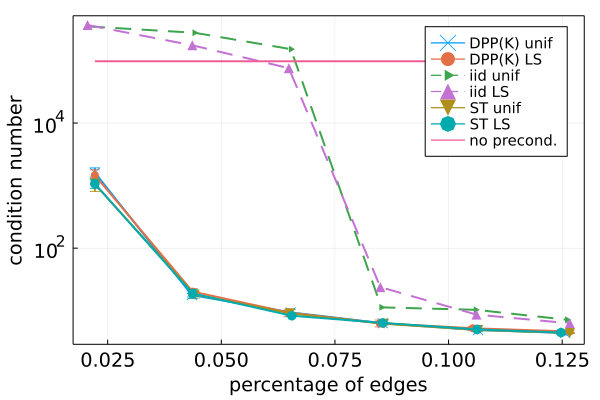

In [31]:
rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 0.

# regularization parameter
q = 0.001

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng)
name = "precond"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")


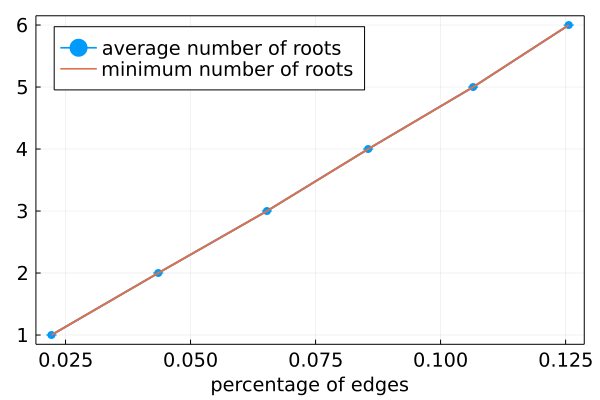

In [32]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

### SBM graph



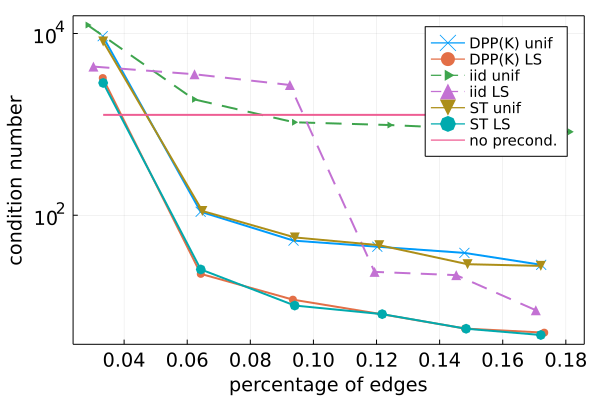

In [33]:
rng = Random.default_rng()

# graph parameters
c = [100 0.01 ;
0.01 20]
n = [400 ; 400]

# regularization parameter
q = 0.1

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple SBM graph
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng)
name = "precond"*"SBM"*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e5)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")


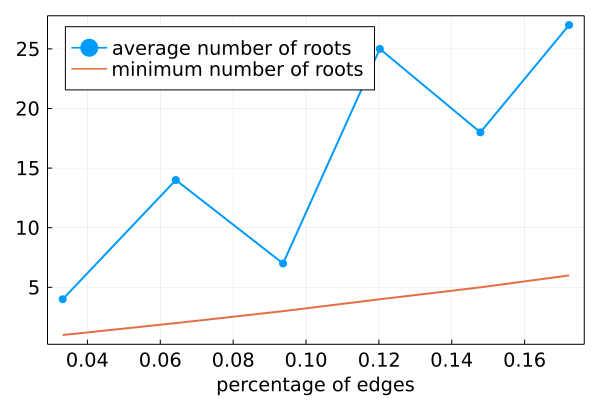

In [34]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

## Magnetic Laplacian

#### MUN graph model

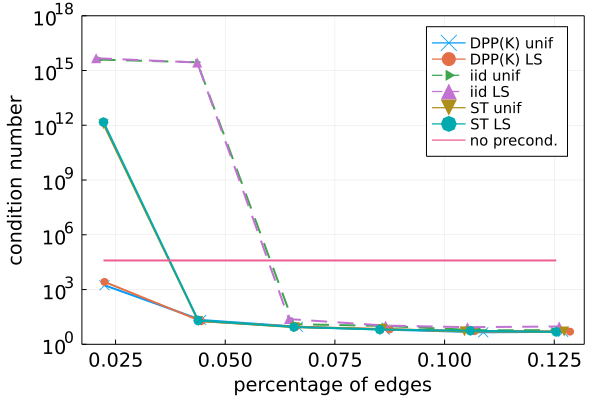

least eigenvalue: [0.0024738535628046066, 79.80460091983541, 81.36736273704975]


In [11]:
type = "MUN" 

rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 1e-2

# regularization parameter
q = 0


# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalues
B = magnetic_incidence(meta_g)
l = eigvals(B' * B)
println("least eigenvalue: ", l[1:3])

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e18)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")


#### ERO graph model

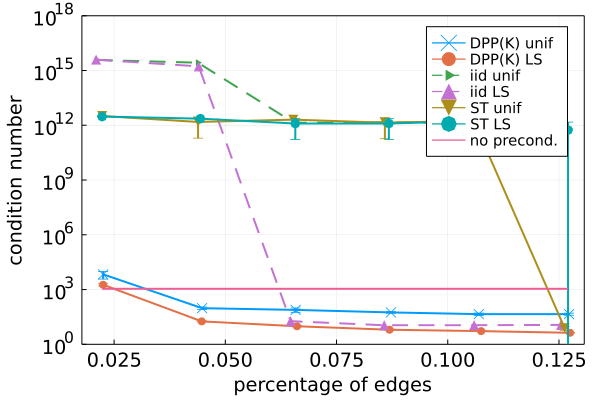

least eigenvalue: [0.08939586481650963, 77.87585765200372, 79.90540567490665]


In [10]:
type = "ERO" 

rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 1e-3

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalues
B = magnetic_incidence(meta_g)
l = eigvals(B' * B)
println("least eigenvalue: ", l[1:3])

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e18)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")
